<a href="https://colab.research.google.com/github/AugustvonMackensen/AI_colab/blob/main/torch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **torch_MNIST.ipynb**

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
from torch.autograd import Variable

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
batch_size = 16
learning_rate = 0.0002
num_epoch = 10

In [4]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

In [5]:
print(mnist_train.__getitem__(0)[0].size(), mnist_train.__len__()) # size는 shape값 확인하기 위함.
print(mnist_test.__getitem__(0)[0].size(), mnist_test.__len__())

torch.Size([1, 28, 28]) 60000
torch.Size([1, 28, 28]) 10000


In [6]:
# 각 라벨별로 몇 개의 데이터가 있는지 확인
count = [0] * 10 # 0을 10개 가진 리스트를 만듦
print(count)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
for i in range(mnist_train.__len__()):
  count[mnist_train.__getitem__(i)[1]] += 1

print(count)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


In [8]:
# mnist 사용 가능한 함수들
dir(mnist_train)
print(mnist_train.__dict__)

{'root': './', 'transform': ToTensor(), 'target_transform': None, 'transforms': StandardTransform
Transform: ToTensor(), 'train': True, 'data': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [

In [9]:
only_data = mnist_train.__dict__['data']
only_data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [10]:
only_label = mnist_train.__dict__['targets']
only_label

tensor([5, 0, 4,  ..., 5, 6, 8])

In [11]:
idx_0 = (only_label == 0) # 라벨이 0인 위치에 True 표시한 텐서
idx_1 = (only_label == 1) # 라벨이 1인 위치에 True 표시한 텐서
print(idx_0)
print(idx_1)
print(idx_0 + idx_1) # True + False => True인 텐서

tensor([False,  True, False,  ..., False, False, False])
tensor([False, False, False,  ..., False, False, False])
tensor([False,  True, False,  ..., False, False, False])


In [12]:
print(torch.sum(idx_0)) # 위에서 확인한 각 라벨이미지의 갯수와 일치함
print(torch.sum(idx_1))
print(torch.sum(idx_0 + idx_1))

tensor(5923)
tensor(6742)
tensor(12665)


In [13]:
print(idx_0.nonzero()[:, 0]) # 0이 아닌 위치의 index 리턴

tensor([    1,    21,    34,  ..., 59952, 59972, 59987])


In [14]:
new_idx = (idx_0 + idx_1).nonzero()[:, 0] # 숫자 0과 숫자 1을 제외한 나머지 이미지들의 인덱스 리턴
print(new_idx)

tensor([    1,     3,     6,  ..., 59984, 59987, 59994])


In [15]:
new_data = torch.index_select(only_data, 0, new_idx)
new_label = torch.index_select(only_label, 0, new_idx)

print(new_data)
print(new_label)

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [16]:
# 새로운 데이터로 대체
mnist_train.__dict__['data'] = new_data
print(mnist_train.__dict__['data'])

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [17]:
# 새로운 라벨로 대체
mnist_train.__dict__['targets'] = new_label
print(mnist_train.__dict__['targets'])

tensor([0, 1, 1,  ..., 1, 0, 1])


In [18]:
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)

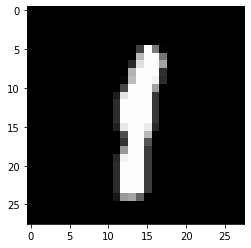

tensor(1)


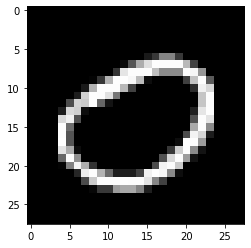

tensor(0)


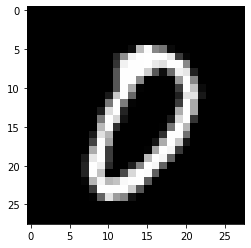

tensor(0)


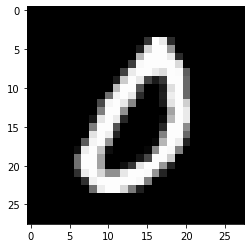

tensor(0)


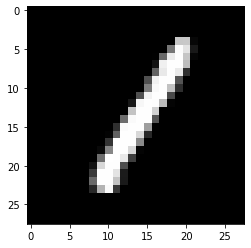

tensor(1)


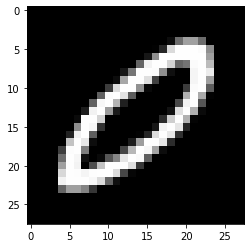

tensor(0)


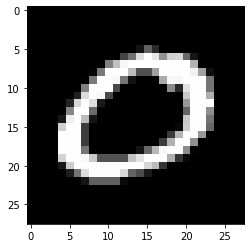

tensor(0)


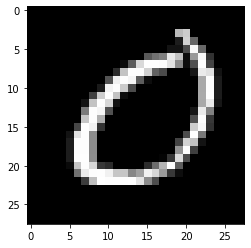

tensor(0)


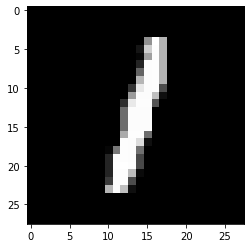

tensor(1)


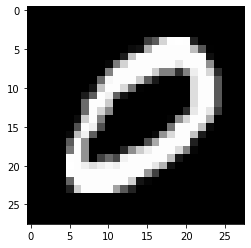

tensor(0)


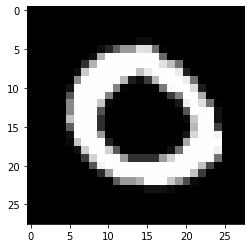

tensor(0)


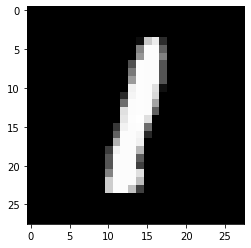

tensor(1)


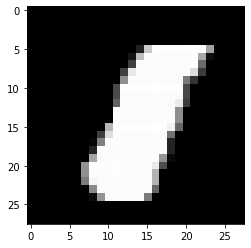

tensor(1)


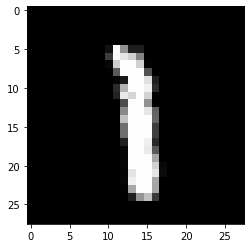

tensor(1)


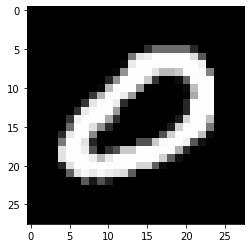

tensor(0)


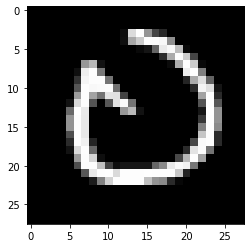

tensor(0)


In [19]:
for image, label in train_loader:
  img = image.numpy()
  for i in range(batch_size):
    plt.imshow(img[i, 0, :, :], cmap='gray') # i번째의 0번째 채널의 모든 행과 모든 열을 읽음.
    plt.show()
    print(label[i])
  break